In [2]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values

def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



In [1]:
data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df_f = pd.DataFrame(data)


NameError: name 'pd' is not defined

<Axes: xlabel='skill_count', ylabel='skill_pay'>

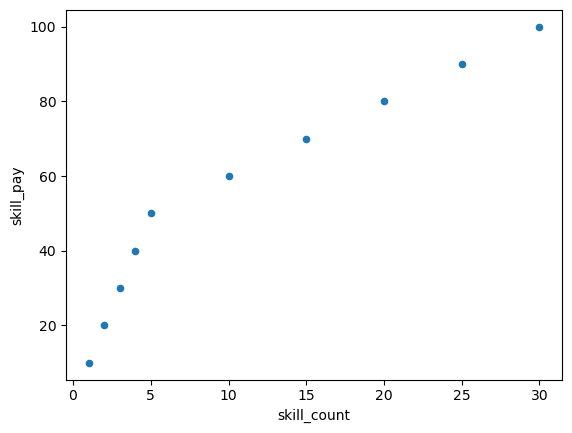

In [ ]:
df_f.plot(kind='scatter', x='skill_count', y='skill_pay')

In [3]:
## My Way

df_exploded = df[df['job_title_short']=='Data Analyst']
df_exploded=df_exploded.explode('job_skills')

df_skills = df_exploded.groupby(['job_skills']).size().sort_values(ascending=False).reset_index(name='counts')
df_median = df_exploded.groupby(['job_skills'])['salary_year_avg'].mean().sort_values(ascending=False).reset_index(name='Median Salary')

df_merged = pd.merge(df_skills,df_median,on= 'job_skills', how='inner')

df_merged.head(10)


,job_skills,counts,Median Salary
0,sql,92428,96401.885253
1,excel,66860,86381.646238
2,python,57190,101457.315231
3,tableau,46455,98020.038940
4,power bi,39380,92254.561079
5,r,29996,98698.165628
6,sas,27998,93715.551900
7,powerpoint,13822,88364.127700
8,word,13562,82617.277650
9,sap,11280,92047.565376


In [ ]:
## Luke method

df_exploded = df[df['job_title_short']=='Data Analyst']
df_exploded=df_exploded.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)



In [ ]:
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


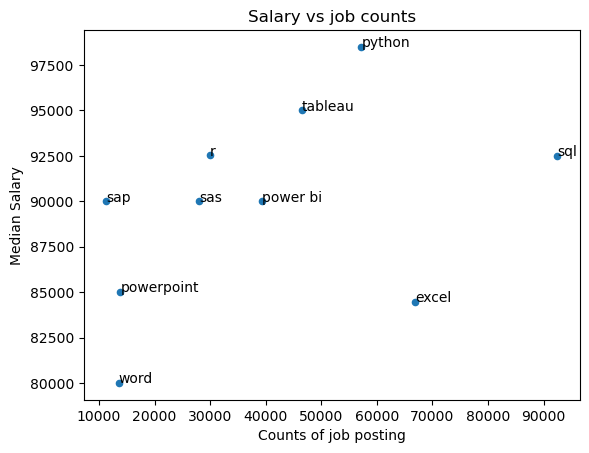

In [ ]:


skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.ylabel("Median Salary")
plt.xlabel("Counts of job posting")
plt.title("Salary vs job counts")

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)


plt.show()

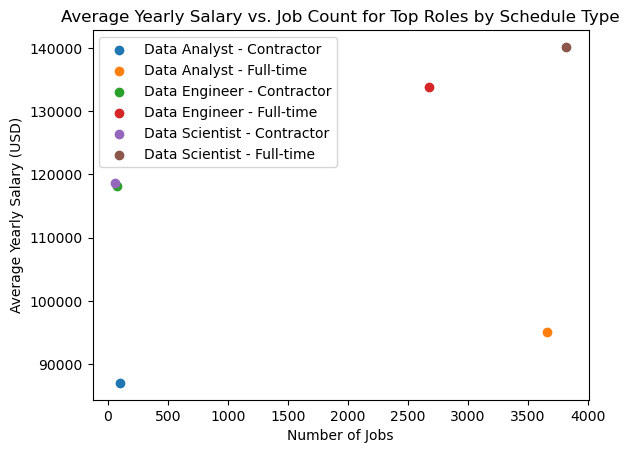

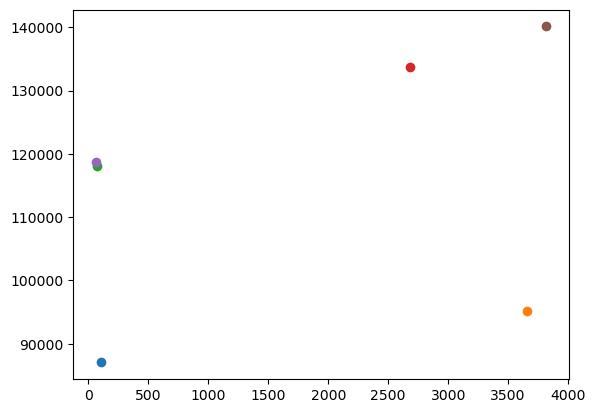